In [1]:
import warnings
warnings.filterwarnings('ignore')
from fractions import Fraction
import numpy as np
#np.seterr(all="ignore")
from myst_nb import glue
from itertools import cycle
import matplotlib.pyplot as plt
from matplotlib import animation
plt.rcParams['figure.figsize'] = [10, 5] #Plotgröße anpassen
import matplotlib
from matplotlib import animation, rc
matplotlib.rcParams['text.usetex'] = True
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
matplotlib.rc('font', **font)

from sympy import *
init_printing(use_latex='mathjax')

from IPython.display import display, Markdown, Latex, Math, HTML


def calculate_TN(vals):
    TEq = Eq(T,1/(w/(2*pi)))
    TEqN = Eq(T,TEq.rhs.subs(vals))
    try:
        vals[T] = TEqN.rhs
    except:
        vals = vals | {T:TEqN.rhs}
    return vals

def calculate_tN(vals,nTN):
    #ntN multiple of Periodendauer 
    tN= nTN*T
    tEqN = Eq(t,tN.subs(vals))
    #display(tEqN)
    try:
        vals[t] = tEqN.rhs
    except:
        vals = vals | {t:tEqN.rhs}
    #display(vals)
    return vals

def calculate_lamN(vals):
    lamSubs = lamEq.rhs.subs({bet:betEq.rhs}).evalf()
    #display(lam)
    lamEqN = Eq(lam,lamSubs.subs(vals))
    #display((lamEqN))
    try:
        vals[lam] = lamEqN.rhs
    except:
        vals = vals | {lam:lamEqN.rhs}
    return vals

def calculate_ZLcN(vals):
    ZLcEqN = Eq(ZLc,ZLcEq.rhs.subs(vals))
    #display(ZLcEqN)
    try:
        vals[ZLc] = ZLcEqN.rhs
    except:
        vals = vals | {ZLc:ZLcEqN.rhs}
    return vals

def calculate_rc0N(vals):
    #display(rc0Eq1)
    rc0Eq1N = Eq(rc0,rc0Eq1.rhs.subs(vals))
    #display(rc0Eq1N)
    try:
        vals[rc0] = rc0Eq1N.rhs
    except:
        vals = vals | {rc0:rc0Eq1N.rhs}
    try:
        vals[rc0abs] = abs(rc0Eq1N.rhs)
    except:
        vals = vals | {rc0abs:abs(rc0Eq1N.rhs)}
    try:
        vals[rc0phase] = arg(rc0Eq1N.rhs)*180/pi
    except:
        vals = vals | {rc0phase:arg(rc0Eq1N.rhs)*180/pi}    
    return vals


def assign_LN(vals,LN):
    #display(rc0Eq1)
    LEqN = Eq(L,LN)
    #display(LEqN)
    try:
        vals[L] = LEqN.rhs
    except:
        vals = vals | {L:LEqN.rhs}
    return vals

def assign_Z2N(vals,Z2cN):
    #display(rc0Eq1)
    Z_2cEqN = Eq(Z2c,Z2cN)
    #display(LEqN)
    try:
        vals[Z2c] = Z_2cEqN.rhs
    except:
        vals = vals | {Z2c:Z_2cEqN.rhs}
    return vals

def assign_legend_entry(sym_legend,symbol,entry):
    try:
        sym_legend[symbol] = entry
    except:
        sym_legend = sym_legend | {symbol:entry}
    return sym_legend

def show_numerical_value(vals,symbol):
    #display(float(vals[symbol]))
    #display(Latex(' ' + latex(symbol) + ' = '))
    text_template = ' %.2e'
    #display(Latex(' ' + latex(symbol) + '  =  \\textrm{' + (text_template % vals[symbol]) + '}' ) )   
    display(Eq(symbol,vals[symbol].evalf()))
    
def show_legend_entry(sym_legend,symbol):
    display(Latex(' ' + latex(symbol) + '  ...  \\textrm{' + sym_legend[symbol] + '}' ) )
    
def equation_over_time(func_of_time,vals,l_array):
    
    func_of_timeSubs = func_of_time.rhs.subs({gam:gamEq.rhs})
    #display(func_of_time)
    #display(func_of_timeSubs)
    func_of_timeN = func_of_timeSubs.subs(vals)
    #display(func_of_timeN)
    
    if func_of_time==0:
        func_of_timeNnp = np.zeros(len(l_array))
    else:
        func_of_timeNnp=lambdify(l, (func_of_timeN),"numpy") #convert sympy to numpy
    #display(UhltNnp(0.0))
    
    
    
    return func_of_timeNnp(l_array)


def generate_xticks(l_array):   
    xtick_array = np.linspace(0,max(l_array),int(max(l_array)/(vals[lam]/4))+1)
    xticklabels_array = []
    xticklabels_template=[str(0),'$\lambda /4 $','$\lambda/2$','$3/4\ \lambda$','$\lambda$']
    c = 0
    c4 = 0
    for i in range(0,len(xtick_array)):
        if i == 0:
            xticklabels_array.append(0)
        else:
            if Fraction(i/4).denominator == 1:
                xticklabels_array.append(r'$' + str(Fraction(i/4).numerator) + ' \lambda$')
            else:
                xticklabels_array.append(r'$ \frac{' + str(Fraction(i/4).numerator) + '}{' + str(Fraction(i/4).denominator) + ' }\lambda$')
    return xtick_array,xticklabels_array

def generate_larray():
    num = 500
    return np.linspace(0,int(vals[L]/vals[lam])*float(lamEq.rhs.subs(vals)),num) #generate array

def plot_over_time(*argv):
    l_array = generate_larray()
    show_numerical_value(vals,t)
    show_numerical_value(vals,ZLc)
    show_numerical_value(vals,lam)
    show_numerical_value(vals,rc0abs)
    show_numerical_value(vals,rc0phase)
    
    
    lamN = vals[lam]    
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 10)
    fig.suptitle('Strom- und Spannungsamplitudenverlauf')

    ax1.grid()
    ax1.invert_xaxis()
    #print(max(l_array))
    
    xtick_array,xticklabels_array = generate_xticks(l_array)
        
    ax1.set(xlabel='Länge in m',xticks=xtick_array)
    ax1.set(xticklabels=xticklabels_array)
    #print(xticklabels_array)
    
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines)
    
    for arg in argv:
        y = equation_over_time(arg,vals,l_array)
        ax1.plot(l_array,y,next(linecycler),label=sym_legend[arg.lhs],lw=2)
        leg = plt.legend(loc='best', ncol=1,  shadow=False, fancybox=False)
        
#plot_over_time(UhltEq,UrltEq,UcltabsEq)

In [2]:
sym_legend = {}
#Complex symbols
Uhcl,Urcl = symbols(r'\underline{U}_h(l),\underline{U}_r(l)',real=false)
sym_legend = assign_legend_entry(sym_legend,Uhcl,'Komplexe hinlaufende Spannungswelle')
sym_legend = assign_legend_entry(sym_legend,Urcl,'Komplexe rücklaufende Spannungswelle')

Ihcl,Ircl = symbols(r'\underline{I}_h(l),\underline{I}_r(l)',real=false)
sym_legend = assign_legend_entry(sym_legend,Ihcl,'Komplexe hinlaufende Stromwelle')
sym_legend = assign_legend_entry(sym_legend,Ircl,'Komplexe rücklaufende Stromwelle')

Uhc0,Urc0 = symbols(r'\underline{U}_h(0),\underline{U}_r(0)',real=false)
sym_legend = assign_legend_entry(sym_legend,Uhc0,r'Komplexe hinlaufende Spannungswelle am Leitungsende $l=0 \ \text{m} $')
sym_legend = assign_legend_entry(sym_legend,Urc0,r'Komplexe rücklaufende Spannungswelle am Leitungsende $l=0 \ \text{m} $')

Ihc0,Irc0 = symbols(r'\underline{I}_h(0),\underline{I}_r(0)',real=false)
sym_legend = assign_legend_entry(sym_legend,Ihc0,r'Komplexe hinlaufende Stromwelle am Leitungsende $l=0 \ \text{m} $')
sym_legend = assign_legend_entry(sym_legend,Irc0,r'Komplexe rücklaufende Stromwelle am Leitungsende $l=0 \ \text{m} $')

Uhclt,Urclt = symbols(r'\underline{U}_h(l\,t),\underline{U}_r(l\,t)',real=false)
sym_legend = assign_legend_entry(sym_legend,Uhclt,'Komplexe hinlaufende Spannungswelle in Abhängigkeit der Position auf der Leitung und der Zeit')
sym_legend = assign_legend_entry(sym_legend,Urclt,'Komplexe rücklaufende Spannungswelle in Abhängigkeit der Position auf der Leitung und der Zeit')

Ihclt,Irclt = symbols(r'\underline{I}_h(l\,t),\underline{I}_r(l\,t)',real=false)
sym_legend = assign_legend_entry(sym_legend,Ihclt,'Komplexe hinlaufende Stromwelle in Abhängigkeit der Position auf der Leitung und der Zeit')
sym_legend = assign_legend_entry(sym_legend,Irclt,'Komplexe rücklaufende Stromwelle in Abhängigkeit der Position auf der Leitung und der Zeit')

Uhc0t,Urc0t = symbols(r'\underline{U}_h(0\,t),\underline{U}_r(0\,t)',real=false)
sym_legend = assign_legend_entry(sym_legend,Uhc0t,r'Komplexe hinlaufende Spannungswelle am Leitungsende $l=0 \ \text{m} $ in Abhängigkeit der Zeit')
sym_legend = assign_legend_entry(sym_legend,Urc0t,r'Komplexe rücklaufende Spannungswelle am Leitungsende $l=0 \ \text{m} $ in Abhängigkeit der Zeit')

Ihc0t,Irc0t = symbols(r'\underline{I}_h(0\,t),\underline{I}_r(0\,t)',real=false)
sym_legend = assign_legend_entry(sym_legend,Ihc0t,r'Komplexe hinlaufende Stromwelle am Leitungsende $l=0 \ \text{m} $ in Abhängigkeit der Zeit')
sym_legend = assign_legend_entry(sym_legend,Irc0t,r'Komplexe rücklaufende Stromwelle am Leitungsende $l=0 \ \text{m} $ in Abhängigkeit der Zeit')

Ucl = symbols(r'\underline{U}(l)',real=false)
sym_legend = assign_legend_entry(sym_legend,Ucl,'Komplexe Spannungswelle')

Icl = symbols(r'\underline{I}(l)',real=false)
sym_legend = assign_legend_entry(sym_legend,Icl,'Komplexe Stromwelle')

Uclt = symbols(r'\underline{U}(l\,t)',real=false)
sym_legend = assign_legend_entry(sym_legend,Uclt,'Komplexe Spannungswelle in Abhängigkeit der Position auf der Leitung und der Zeit')

Iclt = symbols(r'\underline{I}(l\,t)',real=false)
sym_legend = assign_legend_entry(sym_legend,Iclt,'Komplexe Stromwelle in Abhängigkeit der Position auf der Leitung und der Zeit')

gam,ZLc = symbols(r'\gamma,\underline{Z}_L')
sym_legend = assign_legend_entry(sym_legend,gam,'Komplexe Ausbreitungsmaß')
sym_legend = assign_legend_entry(sym_legend,ZLc,'Komplexe Leitungsimpedanz')

#Yet unknown
U1c,U2c = symbols(r'\underline{U}_1,\underline{U}_2')
sym_legend = assign_legend_entry(sym_legend,U1c,'Komplexe Spannung am Leitungsanfang $l=L$')
sym_legend = assign_legend_entry(sym_legend,U2c,'Komplexe Spannung am Leitungsende $l=0$')

I1c,I2c = symbols(r'\underline{I}_1,\underline{I}_2')
sym_legend = assign_legend_entry(sym_legend,I1c,'Komplexer Strom am Leitungsanfang $l=L$')
sym_legend = assign_legend_entry(sym_legend,I2c,'Komplexer Strom am Leitungsende $l=0$')

U1ct,U2ct = symbols(r'\underline{U}_1(t),\underline{U}_2(t)')
sym_legend = assign_legend_entry(sym_legend,U1ct,'Komplexe Spannung am Leitungsanfang $l=L$ in Abhängigkeit der Zeit')
sym_legend = assign_legend_entry(sym_legend,U2ct,'Komplexe Spannung am Leitungsende $l=0$ in Abhängigkeit der Zeit')

I1ct,I2ct = symbols(r'\underline{I}_1(t),\underline{I}_2(t)')
sym_legend = assign_legend_entry(sym_legend,I1ct,'Komplexer Strom am Leitungsanfang $l=L$ in Abhängigkeit der Zeit')
sym_legend = assign_legend_entry(sym_legend,I2ct,'Komplexer Strom am Leitungsende $l=0$ in Abhängigkeit der Zeit')

Z1c,Z2c = symbols(r'\underline{Z}_1,\underline{Z}_2')
sym_legend = assign_legend_entry(sym_legend,I1ct,'Komplexer Widerstand am Leitungsanfang $l=L$')
sym_legend = assign_legend_entry(sym_legend,I2ct,'Komplexer Widerstand am Leitungsende $l=0$')

rcl = symbols(r'\underline{r}(l)')
sym_legend = assign_legend_entry(sym_legend,rcl,'Komplexer Reflexionsfaktor entlang der Leitung')

rc0 = symbols(r'\underline{r}(0)')
sym_legend = assign_legend_entry(sym_legend,rc0,'Komplexer Reflexionsfaktor am Leitungsende $l=0$ ')


#Real symbols
Uhl,Url = symbols(r'U_h(l),U_r(l)',real=true)
sym_legend = assign_legend_entry(sym_legend,Uhl,'Realteil der hinlaufende Spannungswelle')
sym_legend = assign_legend_entry(sym_legend,Url,'Realteil der rücklaufende Spannungswelle')

Ihl,Irl = symbols(r'I_h(l),I_r(l)',real=true)
sym_legend = assign_legend_entry(sym_legend,Ihl,'Realteil der hinlaufende Stromwelle')
sym_legend = assign_legend_entry(sym_legend,Irl,'Realteil der rücklaufende Stromwelle')

Uhlt,Urlt = symbols(r'U_h(l\,t),U_r(l\,t)',real=true)
sym_legend = assign_legend_entry(sym_legend,Uhlt,'Realteil der hinlaufende Spannungswelle in Abhängigkeit der Zeit')
sym_legend = assign_legend_entry(sym_legend,Urlt,'Realteil der  rücklaufende Spannungswelle in Abhängigkeit der Zeit')

Ihlt,Irlt = symbols(r'I_h(l\,t),I_r(l\,t)',real=true)
sym_legend = assign_legend_entry(sym_legend,Ihlt,'Realteil der hinlaufende Stromwelle in Abhängigkeit der Zeit')
sym_legend = assign_legend_entry(sym_legend,Irlt,'Realteil der rücklaufende Stromwelle in Abhängigkeit der Zeit')

Uh0t,Ur0t = symbols(r'U_h(0\,t),U_r(0\,t)',real=true)
sym_legend = assign_legend_entry(sym_legend,Uh0t,'Realteil der hinlaufende Spannungswelle am Leitungsende $l=0$')
sym_legend = assign_legend_entry(sym_legend,Ur0t,'Realteil der  rücklaufende Spannungswelle am Leitungsende $l=0$')

Ih0t,Ir0t = symbols(r'I_h(0\,t),I_r(0\,t)',real=true)
sym_legend = assign_legend_entry(sym_legend,Ih0t,'Realteil der hinlaufende Stromwelle am Leitungsende $l=0$')
sym_legend = assign_legend_entry(sym_legend,Ir0t,'Realteil der rücklaufende Stromwelle am Leitungsende $l=0$')

U1,U2 = symbols(r'U_1,U_2',real=true)
sym_legend = assign_legend_entry(sym_legend,U1,'Realteil der Spannung am Leitungsanfang $l=L$')
sym_legend = assign_legend_entry(sym_legend,U2,'Realteil der Spannung am Leitungsende $l=0$')

I1,I2 = symbols(r'I_1,I_2',real=true)
sym_legend = assign_legend_entry(sym_legend,I1,'Realteil des Stromes am Leitungsanfang $l=L$')
sym_legend = assign_legend_entry(sym_legend,I2,'Realteil des Stromes am Leitungsende $l=0$')

U1t,U2t = symbols(r'U_1(t),U_2(t)',real=true)
sym_legend = assign_legend_entry(sym_legend,U1t,'Realteil der Spannung am Leitungsanfang $l=L$ in Abhängigkeit der Zeit')
sym_legend = assign_legend_entry(sym_legend,U2t,'Realteil der Spannung am Leitungsende $l=0$ in Abhängigkeit der Zeit')

I1t,I2t = symbols(r'I_1(t),I_2(t)',real=true)
sym_legend = assign_legend_entry(sym_legend,I1t,'Realteil des Stromes am Leitungsanfang $l=L$ in Abhängigkeit der Zeit')
sym_legend = assign_legend_entry(sym_legend,I2t,'Realteil des Stromes am Leitungsende $l=0$ in Abhängigkeit der Zeit')

Ul = symbols(r'U(l)',real=false)
sym_legend = assign_legend_entry(sym_legend,Ul,'Realteil der Spannungswelle')

Il = symbols(r'I(l)',real=false)
sym_legend = assign_legend_entry(sym_legend,Il,'Realteil der Stromwelle')

Ult = symbols(r'U(l\,t)',real=false)
sym_legend = assign_legend_entry(sym_legend,Ult,'Realteil der Spannungswelle in Abhängigkeit der Zeit')

Ucltabs = symbols(r'|\underline{U}(l\,t)|',real=true)
sym_legend = assign_legend_entry(sym_legend,Ucltabs,'Absolutwert der Spannungswelle in Abhängigkeit der Zeit')

Ilt = symbols(r'I(l\,t)',real=false)
sym_legend = assign_legend_entry(sym_legend,Ilt,'Realteil der Stromwelle in Abhängigkeit der Zeit')

lam,alp,bet,ZL = symbols(r'lambda,alpha,beta,Z_L',real=true)
sym_legend = assign_legend_entry(sym_legend,lam,'Wellenlänge')
sym_legend = assign_legend_entry(sym_legend,alp,'Dämpfungskonstante')
sym_legend = assign_legend_entry(sym_legend,bet,'Phasenmaß')
sym_legend = assign_legend_entry(sym_legend,ZL,'Reelle Leitungswiderstand')

Rs,Ls,Cs,Gs=symbols('R´,L´,C´,G´',real=true)
sym_legend = assign_legend_entry(sym_legend,Rs,'Widerstandsbelag')
sym_legend = assign_legend_entry(sym_legend,Ls,'Induktionsbelag')
sym_legend = assign_legend_entry(sym_legend,Cs,'Kapazitätsbelag')
sym_legend = assign_legend_entry(sym_legend,Gs,'Leitwertbelag')

t,f,w,l=symbols('t,f,\omega,l',real=true)
T,L=symbols('T,L',real=true)
sym_legend = assign_legend_entry(sym_legend,t,'Zeit')
sym_legend = assign_legend_entry(sym_legend,T,'Periodendauer')
sym_legend = assign_legend_entry(sym_legend,f,'Frequenz')
sym_legend = assign_legend_entry(sym_legend,w,'Kreisfrequenz')
sym_legend = assign_legend_entry(sym_legend,l,'Position auf der Leitung')
sym_legend = assign_legend_entry(sym_legend,L,'Länge der Leitung')

Z1,Z2=symbols(r'Z_1,Z_2')
sym_legend = assign_legend_entry(sym_legend,Z1,'Widerstand am Leitungsanfang $l=L$')
sym_legend = assign_legend_entry(sym_legend,Z2,'Widerstand am Leitungsende $l=0$')

rc0abs = symbols(r'|\underline{r(0)}|')
sym_legend = assign_legend_entry(sym_legend,rc0,'Betrag des Reflexionsfaktors am Leitungsende $l=0$ ')
rc0phase = symbols(r'arg(\underline{r(0)})')
sym_legend = assign_legend_entry(sym_legend,rc0,'Phase des Reflexionsfaktors am Leitungsende $l=0$ ')

PrP = symbols(r'P_{r\%}')
sym_legend = assign_legend_entry(sym_legend,PrP,'Reflektierte Wirkleistung in Prozent')
PhP = symbols(r'P_{h\%}')
sym_legend = assign_legend_entry(sym_legend,PhP,'Hinlaufende Wirkleistung in Prozent')
P2P = symbols(r'P_{2\%}')
sym_legend = assign_legend_entry(sym_legend,P2P,'Wirkleistung am Verbraucher in Prozent')



j=I

# Leitungstheorie
Die Leitungstheorie findet Anwendung, wenn folgende Voraussetzungen erfüllt sind:  
- Es sich um Stromleiter handelt
- Die Wellenlänge und die Leitungslänge sich in ähnlichen Größenordnungen befindet. 

 {cite}`meinke2`
 {cite}`Vid1Obermann`
 {cite}`Vid2Obermann`
 In der Leitungstheorie ist der Begin der Leitung Links. Also vom Verbraucher zum Generator hin. Strom und Spannung werden in Anhängigkeit der Position auf der Leitung $l$ angegeben.
```{figure} ./images/Leitung.jpg
:name: Leitung
:width: 400px

Strom und Spannung auf einer Leitung
```
Die Leitung kann in kleine Leitungsteile zerlegt werden.
```{figure} ./images/Leitungssegment.jpg
:name: Leitungssegment
:width: 400px

Leitungssegment
```

Die Werte der Leitungsbeläge müssen durch Messung bestimmt werden. Typische Werte können aus der Tabelle entnommen werden. {cite}`Werteleitungsbeläge`  
```{figure} ./images/TabelleLeitungsbelaege.png
:name: TabelleLeitungsbelaege
:width: 600px

Typische Werte für Leitungsbeläge {cite}`Werteleitungsbeläge`  
```


## Legende
zum Einblenden auf das **+** clicken.

In [3]:
for key in sym_legend:
    display(Latex(' ' + latex(key) + '  ...  \\textrm{' + sym_legend[key] + '}' ) )
    #display(Latex('$ ' + latex(key) + '$  ...  ' + sym_legend[key] + '' ) )

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Leitungsgleichungen für harmonsiche Signale

In [4]:
show_legend_entry(sym_legend,Uhcl)
UhclEq = Eq(Uhcl,U1c*exp(-gam*(L-l)))
display(UhclEq)

show_legend_entry(sym_legend,Urcl)
UrclEq = Eq(Urcl,U2c*exp(gam*(L-l)))
display(UrclEq)

show_legend_entry(sym_legend,Uhclt)
UhcltEq = Eq(Uhclt,UhclEq.rhs*exp(j*w*t))
display(UhcltEq)

show_legend_entry(sym_legend,Urclt)
UrcltEq = Eq(Urclt,UrclEq.rhs*exp(j*w*l))
display(UrcltEq)

show_legend_entry(sym_legend,Ucl)
UclEq1 = Eq(Ucl,Uhcl+Urcl)
display(UclEq1)

UclEq = Eq(Ucl,UhclEq.rhs+UrclEq.rhs)
#display(UclEq)

show_legend_entry(sym_legend,Uclt)
UcltEq1 = Eq(Uclt,Ucl*exp(j*w*t))
display(UcltEq1)
UcltEq = Eq(Uclt,UclEq.rhs*exp(j*w*t))
#display(UcltEq)

#IclEq = Eq(Icl,Ihcl*exp(gam*l)-Ircl*exp(-gam*l))
#display(IclEq)
#IcltEq = Eq(Iclt,IclEq.rhs*exp(j*w*t))
#display(IcltEq)

<IPython.core.display.Latex object>

                                    -\gamma⋅(L - l)
\underline{U}ₕ₍ₗ₎ = \underline{U}₁⋅ℯ               

<IPython.core.display.Latex object>

                                    \gamma⋅(L - l)
\underline{U}ᵣ₍ₗ₎ = \underline{U}₂⋅ℯ              

<IPython.core.display.Latex object>

                                       -\gamma⋅(L - l)  ⅈ⋅\omega⋅t
\underline{U}_h(l,t) = \underline{U}₁⋅ℯ               ⋅ℯ          

<IPython.core.display.Latex object>

                                       \gamma⋅(L - l)  ⅈ⋅\omega⋅l
\underline{U}_r(l,t) = \underline{U}₂⋅ℯ              ⋅ℯ          

<IPython.core.display.Latex object>

\underline{U}(l) = \underline{U}ₕ₍ₗ₎ + \underline{U}ᵣ₍ₗ₎

<IPython.core.display.Latex object>

                                       ⅈ⋅\omega⋅t
\underline{U}(l,t) = \underline{U}(l)⋅ℯ          

In [5]:
show_legend_entry(sym_legend,gam)
gamEq = Eq(gam,sqrt((Rs+j*w*Ls)*(Gs+j*w*Cs)))
display(gamEq)

show_legend_entry(sym_legend,bet)
betEq = Eq(bet,im(gamEq.rhs))
display(Latex(r'$\beta = Im(\underline{\gamma})$'))

show_legend_entry(sym_legend,alp)
alpEq = Eq(alp,re(gamEq.rhs))
display(Latex(r'$\alpha = Re(\underline{\gamma})$'))

show_legend_entry(sym_legend,ZLc)
ZLcEq = Eq(ZLc,sqrt((Rs+j*w*Ls)/(Gs+j*w*Cs)))
display(ZLcEq)

show_legend_entry(sym_legend,lam)
lamEq=Eq(lam,2*pi/betEq.rhs)
display(Latex('$\lambda = \\frac{2\pi } {\\beta}$'))

show_legend_entry(sym_legend,rc0)
rc0Eq = Eq(rc0,Urc0/Uhc0)
rc0Eq1 = Eq(rc0,(Z2c-ZLc)/(Z2c+ZLc))
display(Latex('$ ' + latex(rc0Eq) + ' = ' + latex(rc0Eq1.rhs) +'$'))

show_legend_entry(sym_legend,PrP)
PrPEq = Eq(PrP,rc0**2*100)
display(PrPEq)

<IPython.core.display.Latex object>

           _______________________________________
\gamma = ╲╱ (ⅈ⋅C´⋅\omega + G´)⋅(ⅈ⋅L´⋅\omega + R´) 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

                      __________________
                     ╱ ⅈ⋅L´⋅\omega + R´ 
\underline{Z}_L =   ╱  ──────────────── 
                  ╲╱   ⅈ⋅C´⋅\omega + G´ 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

                              2
P_{r\%} = 100⋅\underline{r}(0) 

## Spezialfall Verlustlose Leitung
Diese Annahme ist für hohe Frequenzen $f > 1 \ \text{MHz}$ ausreichend genau.

In [6]:
show_legend_entry(sym_legend,Gs)
GsEqN = Eq(Gs,0)
display(GsEqN)

show_legend_entry(sym_legend,Rs)
RsEqN = Eq(Rs,0)
display(RsEqN)

vals = {Gs:GsEqN.rhs,Rs:RsEqN.rhs}

<IPython.core.display.Latex object>

G´ = 0

<IPython.core.display.Latex object>

R´ = 0

Damit vereinfachen sich die Gleichungen erheblich.

In [7]:
ZLEq1 = Eq(ZL,ZLcEq.rhs.subs(vals).simplify())
display(ZLEq1)
gamEq1 = Eq(gam,j*sqrt(Ls*Cs)*w)
display(gamEq1)
alpEq1 = Eq(alp,0)
display(alpEq1)
betEq1 = Eq(bet,w*sqrt(Cs*Ls))
display(betEq1)

          ____
         ╱ L´ 
Z_L =   ╱  ── 
      ╲╱   C´ 

                    _______
\gamma = ⅈ⋅\omega⋅╲╱ C´⋅L´ 

α = 0

             _______
β = \omega⋅╲╱ C´⋅L´ 

### Betrachtung der stehenden, hin- und rücklaufenden Welle
Die **hinlaufende** Welle ergibts sich aus der Spannung am Eingang der Leitung. Für die grafische Darstellung wird der Realteil berechnet. Um die Zeitabhängigkeit zu erhalten müssen die Gleichungen mit $e^{j\cdot \omega \cdot t}$ multipliziert werden.

In [8]:
display(UhcltEq)
UhltEq=Eq(Uhlt,re(UhcltEq.rhs))
display(UhltEq)
#Uh0tEq=Eq(Uh0t,UhltEq.rhs.subs({l:0}))
#display(Uh0tEq)

                                       -\gamma⋅(L - l)  ⅈ⋅\omega⋅t
\underline{U}_h(l,t) = \underline{U}₁⋅ℯ               ⋅ℯ          

             ⎛                -\gamma⋅(L - l)  ⅈ⋅\omega⋅t⎞
U_h(l,t) = re⎝\underline{U}₁⋅ℯ               ⋅ℯ          ⎠

Die Berechnung der **stehenden** Welle erfolgt über den Reflexionsfaktor.

In [9]:
display(Markdown('Allgemein wird die stehende Welle wie folgt beschrieben.'))
display(UclEq1)
display(Markdown('Die hinlaufende Welle ist definiert zu.'))
display(UhclEq)
display(Markdown('Durch aufteilung des Exponenten lässt sich die Gleichung umformen.'))
UhclEq1 = Eq(Uhcl,Uhc0*exp(gam*l))
display(UhclEq1)
display(Markdown('Die rückluafende Welle ist definiert zu.'))
display(UrclEq)
display(Markdown('Wieder lässt sich die Gleichung durch aufteilung des Exponenten umformen.'))
UrclEq1 = Eq(Urcl,Urc0*exp(-gam*l))
display(UrclEq1)

display(Markdown('Werden nun die umgeformenten Gleichungen in die allgemeine Gleichung für die Spannung eingesetzt, erhält man eine Gleichung die nicht mehr von $U_2$ abhängt.'))
UclEq2 = Eq(Ucl,UclEq1.subs({Uhcl:UhclEq1.rhs,Urcl:UrclEq1.rhs}))
display(UclEq2)
display(Markdown(r'Wird nun noch \$U_h(0)$ heraus gehoben, dann kann der Term $\frac{U_r(0)}{U_h(0)} $ durch den Reflexionsfaktor ersetzt werden.'))
UclEq2=Eq(Ucl,Uhc0*(exp(gam*l)+Urc0/Uhc0*exp(-gam*l)))
display(UclEq2)
display(Markdown(r'In der abschließenden Form ergibt sich die Gleichung der Spannungswelle auf der Leitung wie folgt.'))
UclEq3=Eq(Ucl,Uhc0*(exp(gam*l)+rc0*exp(-gam*l)))
display(UclEq3)
display(Markdown('Die hinlaufende Welle am Kabelende, Verbraucherseitig, ergibt sich durch einsetzen von $l=0$'))
Uhc0tEq=Eq(Uhc0t,UhcltEq.rhs.subs({l:0}))
display(Uhc0tEq)
display(Markdown('Wird auch diese Gleichung noch eingesetzt so erhält man die endgültige From die nun grafisch dargestellt werden kann.'))
UcltEq2 = Eq(Uclt,UclEq3.rhs.subs({Uhc0:Uhc0tEq.rhs}))
display(UcltEq2)
#display(Markdown('Für die grafische Darstellung wird der Realteil benötigt.'))
UltEq = Eq(Ult,re(UcltEq2.rhs))
#display(UltEq)

display(Markdown('Für die grafische Darstellung wird der Absolutwert benötigt.'))
UcltabsEq = Eq(Ucltabs,abs(UcltEq2.rhs))
display(UcltabsEq)

Allgemein wird die stehende Welle wie folgt beschrieben.

\underline{U}(l) = \underline{U}ₕ₍ₗ₎ + \underline{U}ᵣ₍ₗ₎

Die hinlaufende Welle ist definiert zu.

                                    -\gamma⋅(L - l)
\underline{U}ₕ₍ₗ₎ = \underline{U}₁⋅ℯ               

Durch aufteilung des Exponenten lässt sich die Gleichung umformen.

                                       \gamma⋅l
\underline{U}ₕ₍ₗ₎ = \underline{U}ₕ₍₀₎⋅ℯ        

Die rückluafende Welle ist definiert zu.

                                    \gamma⋅(L - l)
\underline{U}ᵣ₍ₗ₎ = \underline{U}₂⋅ℯ              

Wieder lässt sich die Gleichung durch aufteilung des Exponenten umformen.

                                       -\gamma⋅l
\underline{U}ᵣ₍ₗ₎ = \underline{U}ᵣ₍₀₎⋅ℯ         

Werden nun die umgeformenten Gleichungen in die allgemeine Gleichung für die Spannung eingesetzt, erhält man eine Gleichung die nicht mehr von $U_2$ abhängt.

                                                         \gamma⋅l                      -\gamma⋅l
\underline{U}(l) = \underline{U}(l) = \underline{U}ₕ₍₀₎⋅ℯ         + \underline{U}ᵣ₍₀₎⋅ℯ         

Wird nun noch \$U_h(0)$ heraus gehoben, dann kann der Term $\frac{U_r(0)}{U_h(0)} $ durch den Reflexionsfaktor ersetzt werden.

                                     ⎛                               -\gamma⋅l⎞
                                     ⎜ \gamma⋅l   \underline{U}ᵣ₍₀₎⋅ℯ         ⎟
\underline{U}(l) = \underline{U}ₕ₍₀₎⋅⎜ℯ         + ────────────────────────────⎟
                                     ⎝                 \underline{U}ₕ₍₀₎      ⎠

In der abschließenden Form ergibt sich die Gleichung der Spannungswelle auf der Leitung wie folgt.

                                     ⎛                  -\gamma⋅l    \gamma⋅l⎞
\underline{U}(l) = \underline{U}ₕ₍₀₎⋅⎝\underline{r}(0)⋅ℯ          + ℯ        ⎠

Die hinlaufende Welle am Kabelende, Verbraucherseitig, ergibt sich durch einsetzen von $l=0$

                                       -L⋅\gamma  ⅈ⋅\omega⋅t
\underline{U}_h(0,t) = \underline{U}₁⋅ℯ         ⋅ℯ          

Wird auch diese Gleichung noch eingesetzt so erhält man die endgültige From die nun grafisch dargestellt werden kann.

                                    ⎛                  -\gamma⋅l    \gamma⋅l⎞  -L⋅\gamma  ⅈ⋅\omega⋅t
\underline{U}(l,t) = \underline{U}₁⋅⎝\underline{r}(0)⋅ℯ          + ℯ        ⎠⋅ℯ         ⋅ℯ          

Für die grafische Darstellung wird der Absolutwert benötigt.

                        -L⋅re(\gamma) │               ⎛                  -\gamma⋅l    \gamma⋅l⎞│
|\underline{U}(l,t)| = ℯ             ⋅│\underline{U}₁⋅⎝\underline{r}(0)⋅ℯ          + ℯ        ⎠│

Die **rücklaufende** Welle lässt sich wie folgt berechnen.

In [10]:
display(Markdown('Die allgemeine Geichung für die stehende Welle wird auf $U_r(l)$ umgeformt.'))
display(UclEq1)
UrclEq1 = Eq(Urcl,solve(UclEq1,Urcl)[0])
display(UrclEq1)
display(Markdown(r'Die Gleichung für die stehende Welle und für die hinlaufende Welle wird eingesetzt.'))
UrclEq2 = Eq(Urclt,(UrclEq1.rhs.subs({Ucl:UcltEq2.rhs,Uhcl:UhcltEq.rhs})).simplify())
display(UrclEq2)
display(Markdown('Der für die grafische darstellung benötigte Realteil.'))
UrltEq = Eq(Ult,re(UrclEq2.rhs))
display(UrltEq)

Die allgemeine Geichung für die stehende Welle wird auf $U_r(l)$ umgeformt.

\underline{U}(l) = \underline{U}ₕ₍ₗ₎ + \underline{U}ᵣ₍ₗ₎

\underline{U}ᵣ₍ₗ₎ = \underline{U}(l) - \underline{U}ₕ₍ₗ₎

Die Gleichung für die stehende Welle und für die hinlaufende Welle wird eingesetzt.

                                                        -L⋅\gamma - \gamma⋅l + ⅈ⋅\omega⋅t
\underline{U}_r(l,t) = \underline{U}₁⋅\underline{r}(0)⋅ℯ                                 

Der für die grafische darstellung benötigte Realteil.

           ⎛                                 -L⋅\gamma - \gamma⋅l + ⅈ⋅\omega⋅t⎞
U(l,t) = re⎝\underline{U}₁⋅\underline{r}(0)⋅ℯ                                 ⎠

### Grafische Darstellung
Für die grafische Darstellung wird der Realteil benötigt.
**Alle Werte sind in den SI Einheiten OHNE Einheitenvorsatz angegeben. Winkel sind in Grad angegeben.**
```{tip}
Durch anklicken der Rakete rechts oben und anschließendem öffnen des Notebooks in Binder wird das Notebook interaktiv! Verschiedene Ergebnisse für verscheidene Werte können damit betrachtet werden.
```

Die Werte der Leitungsbeläge müssen durch Messung bestimmt werden. Typische Werte können aus der Tabelle entnommen werden. {cite}`Werteleitungsbelege`  
```{figure} ./images/TabelleLeitungsbelege.png
:name: TabelleLeitungsbelege
:width: 600px

Typische Werte für Leitungsbelege {cite}`Werteleitungsbelege`  
```


In [11]:
LsN=2.5 * 10**-9*10**2 # H/m
LsEqN = Eq(Ls,LsN)
vals = vals | {Ls:LsEqN.rhs}
display(LsEqN)

CsN=1 * 10**-12*10**2 # F/m
CsEqN = Eq(Cs,CsN)
vals = vals | {Cs:CsEqN.rhs}
display(CsEqN)

wN=2*pi*10**6 # 1/s
wEqN = Eq(w,wN)
vals = vals | {w:wEqN.rhs}
display(wEqN)

U1cN=8 # V
U1cEqN = Eq(U1c,U1cN)
vals = vals | {U1c:U1cEqN.rhs}
display(U1cEqN)

Z2cN= 10**-6  #Ohm
vals = assign_Z2N(vals,Z2cN)
Z2EqN = Eq(Z2c,Z2cN)
display(Z2EqN)

#I2cN=1 #A
#I2cEqN = Eq(I2c,I2cN)
#display(I2cEqN)

L´ = 2.5e-7

C´ = 1.0e-10

\omega = 2000000⋅π

\underline{U}₁ = 8

\underline{Z}₂ = 1.0e-6

In [12]:
vals = calculate_ZLcN(vals)
vals = calculate_lamN(vals)
vals = calculate_TN(vals) 
vals = calculate_rc0N(vals)
vals = assign_LN(vals,4*vals[lam])
#display(Latex('$\underline{r(0)} = ' + latex(abs(vals[rc0])) + '\ $'))
display(Eq(rc0,vals[rc0]))

show_numerical_value(vals,rc0abs)
show_numerical_value(vals,lam)

\underline{r}(0) = -0.999999960000001

|\underline{r(0)}| = 0.999999960000001

λ = 200.0

Plot der Wellen über die Leitungslänge

t = 0

\underline{Z}_L = 50.0

λ = 200.0

|\underline{r(0)}| = 0.999999960000001

arg(\underline{r(0)}) = 180.0

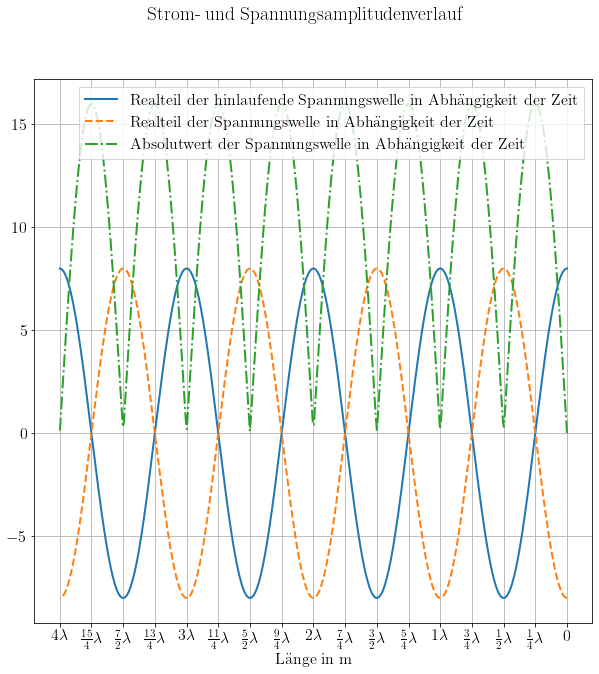

In [13]:
vals = calculate_tN(vals,0)
plot_over_time(UhltEq,UrltEq,UcltabsEq)   

Die Wellen zu einem anderen Zeitpunkt.

t = 3.18309886183791e-7

\underline{Z}_L = 50.0

λ = 200.0

|\underline{r(0)}| = 0.999999960000001

arg(\underline{r(0)}) = 180.0

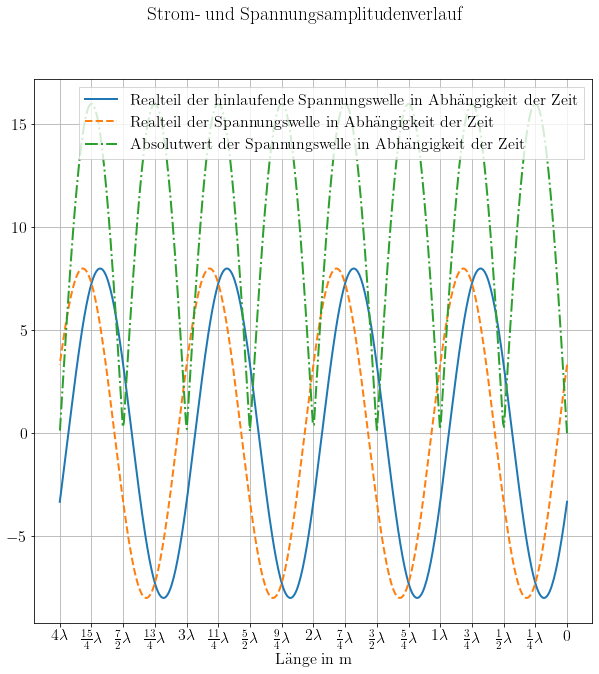

In [14]:
vals = calculate_tN(vals,1/pi)
plot_over_time(UhltEq,UrltEq,UcltabsEq)   

Zeitlicher verlauf der hin-, rück- und stehenden Welle.

In [ ]:
vals = calculate_tN(vals,0)
assign_Z2N(vals,100)
vals = calculate_rc0N(vals)
#display(Latex('$\underline{r(0)} = ' + latex(abs(vals[rc0])) + '\ $'))
#display(Eq(Z2c,vals[Z2c]))
#display(Eq(rc0,abs(vals[rc0])))
#display(Eq(rc0,(180/pi*arg(vals[rc0]).evalf))

show_numerical_value(vals,Z2c)
show_numerical_value(vals,ZLc)
show_numerical_value(vals,lam)
show_numerical_value(vals,rc0abs)
show_numerical_value(vals,rc0phase)


#animation
fig, ax1 = plt.subplots(1, 1)
#ax2 = ax1.twinx()
lamN = vals[lam]
l_array = generate_larray()

ax1.set(xlim=(0, float(lamN)))
ax1.grid()


#text = ax1.text(3/4*lamN, 2.05, '')


xtick_array,xticklabels_array = generate_xticks(l_array)

#,xticklabels=[0,'$\lambda /4 $','$\lambda/2$','$3/4\ \lambda$','$\lambda$']
ax1.set(xlabel='Länge in m',xlim=(0, float(lamN)),xticks=xtick_array)
ax1.set(xticklabels=xticklabels_array)

ax1.set(ylabel ='Voltage in V')

ax1.invert_xaxis()

#ax2.set(xlabel='Länge in m',xticks=[0,lamN/4,lamN/2,3/4*lamN,lamN],xticklabels=[0,'$\lambda /4 $','$\lambda/2$','$3/4\ \lambda$','$\lambda$'])
line1, = ax1.plot([], [], 'b', lw=2,label=sym_legend[UhltEq.lhs])
line2, = ax1.plot([], [], 'r--', lw=2,label=sym_legend[UrltEq.lhs])
#line3, = ax1.plot([], [], 'k--', lw=2,label=sym_legend[UltEq.lhs])
line4, = ax1.plot([], [], 'm--', lw=2,label=sym_legend[UcltabsEq.lhs])
leg = plt.legend(loc=8, ncol=1,  shadow=False, fancybox=False)

y1 = equation_over_time(UhltEq,vals,l_array)   
y2 = equation_over_time(UrltEq,vals,l_array)   
y4 = equation_over_time(UcltabsEq,vals,l_array) 
ys = np.append(np.append(y1,y2),y4)

text = ax1.text(l_array[-1], max(ys)*1.05, '')
time_template = 't = %.2e $\mu $s'

nTN_array = np.arange(0,1,0.01)

def init():
#    line, = ax.plot([], [], 'b', lw=2)
    return line1, line2, text

def animate(i):
    nTN = nTN_array[i]
    #display(nTN_array)
    
    x = l_array
    vals1 = calculate_tN(vals,nTN)
    
    y1 = equation_over_time(UhltEq,vals1,l_array)
    
    y2 = equation_over_time(UrltEq,vals1,l_array)   
    #display(y2)
    
    #y3 = equation_over_time(UltEq,vals1,l_array) 
    
    y4 = equation_over_time(UcltabsEq,vals1,l_array) 
       
    ax1.set(ylim= (min(np.append(np.append(y1,y2),y4)), max(np.append(np.append(y1,y2),y4))))
    
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    #line3.set_data(x, y3)
    line4.set_data(x, y4)
    text.set_text(time_template % (vals[t]*(10**6)))
    return line1, line2, text

anim = animation.FuncAnimation(fig, animate, np.arange(1, len(nTN_array)),interval=50, blit=True, init_func=init)

plt.close()

HTML(anim.to_jshtml())

\underline{Z}₂ = 100.0

\underline{Z}_L = 50.0

λ = 200.0

|\underline{r(0)}| = 0.333333333333333

arg(\underline{r(0)}) = 0

Wellen in abhägigkeit des Abschlusswidersandes $\underline{Z}_2$.

In [16]:
#ax2 = ax1.twinx()
lamN = vals[lam]

vals = calculate_tN(vals,1/pi)
vals = calculate_tN(vals,0)

show_numerical_value(vals,t)
#show_numerical_value(vals,Z2c)
show_numerical_value(vals,ZLc)
show_numerical_value(vals,lam)
#show_numerical_value(vals,rc0)

l_array = generate_larray()
xtick_array,xticklabels_array = generate_xticks(l_array)

#animation
fig, ax1 = plt.subplots(1, 1)
ax1.set(xlim=(0, float(lamN)))
ax1.grid()


#x-Axis
ax1.set(xlabel='Länge in m',xlim=(0, float(lamN)),xticks=xtick_array)
ax1.set(xticklabels=xticklabels_array)
ax1.invert_xaxis()

#y-Axis
ax1.set(ylabel ='Voltage in V')
y1 = equation_over_time(UhltEq,vals,l_array)
y2 = equation_over_time(UrltEq,vals,l_array)
y3 = equation_over_time(UcltabsEq,vals,l_array)
ys = np.append(np.append(y1,y2),y3)
ax1.set(ylim= (min(ys), max(ys)))


line1, = ax1.plot([], [], 'b', lw=2,label=sym_legend[UhltEq.lhs])
line2, = ax1.plot([], [], 'r--', lw=2,label=sym_legend[UrltEq.lhs])
line3, = ax1.plot([], [], 'k--', lw=2,label=sym_legend[UcltabsEq.lhs])
leg = plt.legend(loc=8, ncol=1,  shadow=False, fancybox=False)

#text = ax1.text(3/4*lamN, 2.05, '')
text_template = '$|r(0)|$ = %.2f'
text2 = ax1.text(l_array[-1], max(ys)*1.05, '')
text2_template = r'$ \underline{Z}_2$ = %.2f'

Z2cN_array = np.arange(0.0,10*float(vals[ZLc]),1/10*float(vals[ZLc]))
Z2cN_array[0] = 0.01
#print(Z2cN_array)


def init():
#    line, = ax.plot([], [], 'b', lw=2)
    return line1, line2, text

def animate(i):
    Z2cN = Z2cN_array[i]
    
    #display(nTN_array)
    
    x = l_array
    vals1 = assign_Z2N(vals,Z2cN)
    vals1 = calculate_rc0N(vals1)
    
    y1 = equation_over_time(UhltEq,vals1,l_array)
    
    y2 = equation_over_time(UrltEq,vals1,l_array)
    
    y3 = equation_over_time(UcltabsEq,vals1,l_array)
    
    ys = np.append(np.append(y1,y2),y3)
    
    #ax1.set(ylim= (min(ys), max(ys)))
    
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    line3.set_data(x, y3)
    #text.set_text(text_template % (float(vals[rc0])))
    #test2 = ('$ ' + latex(Z2c) + '  =  \\textrm{' +  str(vals[Z2c]) + '}$' )   
    text2.set_text(text2_template % (float(vals[Z2c])) + ' ; ' + text_template % (float(vals[rc0abs])))
    
    return line1, line2, text

anim = animation.FuncAnimation(fig, animate, np.arange(1, len(Z2cN_array)),interval=50, blit=True, init_func=init)

plt.close()

HTML(anim.to_jshtml())

t = 0

\underline{Z}_L = 50.0

λ = 200.0

## Leitungstranformation und Leitungsanpassung
Unter Transformation ist zu verstehen wie die Leitung und der Abschluss der Leitung sich auf den Leitungseingang auswirken. Die Betrachtung erfolgt analog zur Vierpoltheorie. Auf die Herleitung der Transformationsgleichung aus der $A$ Vierpolmatrix soll an dieser Stelle verzichtet werden. {cite}`Vid3Obermann`

In [17]:
Z1cEq = Eq(Z1c,ZLc*((Z2c/ZLc+j*tan(2*pi*l/lam))/(1+j*(Z2c/ZLc)*tan(2*pi*l/lam))))
display(Z1cEq)
glue("Z1cEq", Z1cEq, display=False)

                                 ⎛ \underline{Z}₂        ⎛2⋅π⋅l⎞⎞
                 \underline{Z}_L⋅⎜─────────────── + ⅈ⋅tan⎜─────⎟⎟
                                 ⎝\underline{Z}_L        ⎝  λ  ⎠⎠
\underline{Z}₁ = ────────────────────────────────────────────────
                                             ⎛2⋅π⋅l⎞             
                         ⅈ⋅\underline{Z}₂⋅tan⎜─────⎟             
                                             ⎝  λ  ⎠             
                         ─────────────────────────── + 1         
                               \underline{Z}_L                   

### Spezialfall Kurzschluss am Ausgang

In [18]:
Z1cshortedEq=Eq(Z1c,limit(Z1cEq.rhs,Z2c,0))
display(Z1cshortedEq)

                                      ⎛2⋅π⋅l⎞
\underline{Z}₁ = ⅈ⋅\underline{Z}_L⋅tan⎜─────⎟
                                      ⎝  λ  ⎠

### Spezialfall Leerlauf am Ausgang

In [19]:
Z1copenEq=Eq(Z1c,limit(Z1cEq.rhs,Z2c,oo))
display(Z1copenEq) 

                 -ⅈ⋅\underline{Z}_L 
\underline{Z}₁ = ───────────────────
                         ⎛2⋅π⋅l⎞    
                      tan⎜─────⎟    
                         ⎝  λ  ⎠    

### Spezialfall $\frac{\lambda}{4}$ Leiter
Anwendung als EMI-Schleife als Blitzschutz.
```{figure} ./images/EMI-Schleife.png
:name: EMI-Schleife
:width: 400px

EMI-Schleife
```

In [20]:
Z1clam4Eq=Eq(Z1c,limit(Z1cEq.rhs,l,lam/4))
display(Z1clam4Eq)

                                2
                 \underline{Z}_L 
\underline{Z}₁ = ────────────────
                  \underline{Z}₂ 

#### $\frac{\lambda}{4}$ Leiter Kurzgeschlossen
$\underline{Z}_2 = 0 \ \Omega$.   
$\underline{Z}_1$ geht gegen $\infty$. Das bedeutet, dass eine Quelle am Eingang quais im Leerlauf arbeitet.

In [21]:
Z1clam4shortedEq=Eq(Z1c,limit(Z1clam4Eq.rhs,Z2c,0))
display(Z1clam4shortedEq)

                       ⎛               2⎞
\underline{Z}₁ = ∞⋅sign⎝\underline{Z}_L ⎠

#### $\frac{\lambda}{4}$ Leiter Leerlauf
$\underline{Z}_2 = \infty \ \Omega$.   
$\underline{Z}_1$ geht gegen $0$. Das bedeutet, dass eine Quelle am Eingang quasi Kurzgeschlossen wird.

In [22]:
Z1clam4openEq=Eq(Z1c,limit(Z1clam4Eq.rhs,Z2c,oo))
display(Z1clam4openEq)

\underline{Z}₁ = 0

### Spezialfall $\frac{\lambda}{2}$ Leiter

In [23]:
Z1clam2Eq=Eq(Z1c,limit(Z1cEq.rhs,l,lam/2))
display(Z1clam2Eq)

\underline{Z}₁ = \underline{Z}₂

## Anpassung
Unter Anpassung in der Leitungstheorie versteht man, dass Elemente der Signalkette reflexionsfrei gekoppelt werden $|\underline{r}(0)| = 0$. Die Gleichung {glue:}`Z1cEq` kann dafür gelöst werden. Eine Alternative bietet das Smith Diagramm. Es geht also darum Lasten die eine Impedanz ungleich der Leitungsimpedanz haben Reflexionsfrei anzuschließen.  
Es ist zwischen der Leitungsanpassung und der Lei**s**tungsanpassung zu unterscheiden. Hier soll die Leitungsanpassung betrachtet werden. Leitungsanpassung liegt vor, wenn der Leitungswiderstand $\underline{Z}_L$ gleich dem Abschlusswiderstand $\underline{Z}_2$ ist. Leistungsanpassung dazu würde vorliegen, wenn $\underline{Z}_2$ gleich dem konjugiert-komplexen Leitungswiderstand $\underline{Z}_L^*$ entspricht.

Die Fragestellung lautet, wie die Widerstände angepasst werden wenn diese nicht gleich groß sind.
```{figure} ./images/Anpassung1.png
:name: Anpassungsproblem
:width: 400px

Anpassungsproblem
```

Wenn der Leitungswiderstand $\underline{Z}_L$ kleiner als der Lastwiderstand $\underline{Z}_2$ ist muss die folgende Kompensationsschaltung verwendet werden.
```{figure} ./images/AnpassungZLsmallerZ2.png
:name: AnpassungZLsmallerZ2
:width: 400px

Anpassung bei $\underline{Z}_L < $\underline{Z}_2$
```

Wenn der Leitungswiderstand $\underline{Z}_L$ größe als der Lastwiderstand $\underline{Z}_2$ ist muss die folgende Kompensationsschaltung verwendet werden.
```{figure} ./images/AnpassungZLbiggerZ2.png
:name: AnpassungZLbiggerZ2
:width: 400px

Anpassung bei $\underline{Z}_L > $\underline{Z}_2$
```